<a href="https://colab.research.google.com/github/bobbypaton/comporgchem/blob/main/NMR_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install rdkit
%pip install pyscf
%pip install geometric
%pip install git+https://github.com/pyscf/properties
%pip install py3Dmol


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/pyscf/properties to /tmp/pip-req-build-r7245tc5
  Running command git clone --filter=blob:none --quiet https://github.com/pyscf/properties /tmp/pip-req-build-r7245tc5
  Resolved https://github.com/pyscf/properties to commit 92a4df7645033349232c4776355f8e53a9256987
  Preparing metadata (setup.py) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import py3Dmol
import pyscf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from rdkit import Chem
from rdkit.Geometry import Point3D
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

from pyscf import gto, lo, tools, dft 
from pyscf.geomopt.geometric_solver import optimize
from pyscf.prop import nmr

/usr/local/lib/python3.10/dist-packages/pyscf/prop/efg/rhf.py:45: UserWarning: Module EFG is under testing
  warnings.warn('Module EFG is under testing')
/usr/local/lib/python3.10/dist-packages/pyscf/prop/efg/dhf.py:30: UserWarning: Module EFG is under testing
  warnings.warn('Module EFG is under testing')
/usr/local/lib/python3.10/dist-packages/pyscf/prop/zfs/uhf.py:40: UserWarning: Module ZFS is under testing
  warnings.warn('Module ZFS is under testing')
/usr/local/lib/python3.10/dist-packages/pyscf/prop/gtensor/uhf.py:43: UserWarning: Module g-tensor is under testing
  warnings.warn('Module g-tensor is under testing')
/usr/local/lib/python3.10/dist-packages/pyscf/prop/gtensor/uks.py:41: UserWarning: Module g-tensor is under testing
  warnings.warn('Module g-tensor is under testing')
/usr/local/lib/python3.10/dist-packages/pyscf/prop/hfc/uks.py:35: UserWarning: Module HFC is under testing
  warnings.warn('Module HFC is under testing')
/usr/local/lib/python3.10/dist-packages/pyscf/pr

In [4]:
# A function for displaying conformers in 3D
def drawit(m,confId=-1):
        p = py3Dmol.view(width=400,height=400)
        mb = Chem.MolToMolBlock(m,confId=confId)
        p.removeAllModels()
        p.addModel(mb,'sdf')
        p.setStyle({'stick':{}})
        p.setBackgroundColor('0xeeeeee')
        p.zoomTo()
        return p.show()

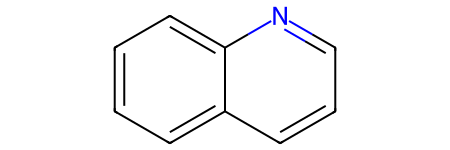

In [5]:
smi = 'C1=CC=C2C(=C1)C=CC=N2'
mol = Chem.MolFromSmiles(smi)
mol

In [6]:
molH = Chem.AddHs(mol)
AllChem.EmbedMolecule(molH)
AllChem.MMFFOptimizeMolecule(molH)
drawit(molH)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [8]:
elements = [atom.GetSymbol() for atom in molH.GetAtoms()]
coordinates = molH.GetConformer().GetPositions()
atoms = [(element, coordinate) for element, coordinate in zip(elements, coordinates)]

pyscf_mole = gto.Mole(atom=atoms, basis="6-31G*")
pyscf_mole.build();

mf = dft.RKS(pyscf_mole)
mf.xc = 'b3lyp'

# geometry optimization 
mol_eq = optimize(mf, maxsteps=100)

geometric-optimize called with the following command line:
/usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-5ebad577-89ae-4ed7-b84a-a5a0ec58a4b9.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********      .


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -2.298009   0.713160   0.198880    0.000000  0.000000  0.000000
   C  -2.387558  -0.606685  -0.228723    0.000000  0.000000  0.000000
   C  -1.222517  -1.347057  -0.451934    0.000000  0.000000  0.000000
   C   0.039323  -0.800700  -0.258112    0.000000  0.000000  0.000000
   C   0.124544   0.539826   0.176108    0.000000  0.000000  0.000000
   C  -1.044825   1.287678   0.401656    0.000000  0.000000  0.000000
   C   1.399379   1.087903   0.370639    0.000000 -0.000000  0.000000
   C   2.527825   0.312209   0.135526   -0.000000  0.000000  0.000000
   C   2.342177  -0.990151  -0.287741    0.000000  0.000000  0.000000
   N   1.130468  -1.554005  -0.486487    0.000000  0.000000  0.000000
   H  -3.200214   1.293431   0.373940    0.000000  0.000000  0.000000
   H  -3.359396  -1.065666  -0.390315    0.000000  0.000000  0.000000
   H  -1.299535  -2.378847  -0.7

Step    0 : Gradient = 2.144e-02/4.127e-02 (rms/max) Energy = -399.4571062740
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 4.80408e-01 5.37344e-01 5.51505e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -2.284903   0.716809   0.200260    0.013107  0.003649  0.001380
   C  -2.374364  -0.624959  -0.234409    0.013194 -0.018274 -0.005686
   C  -1.244974  -1.385238  -0.464737   -0.022457 -0.038182 -0.012803
   C   0.024855  -0.792117  -0.255908   -0.014468  0.008583  0.002204
   C   0.125359   0.578289   0.188327    0.000815  0.038463  0.012219
   C  -1.061453   1.321872   0.412410   -0.016627  0.034194  0.010754
   C   1.418376   1.124227   0.382473    0.018997  0.036323  0.011835
   C   2.507371   0.309332   0.134136   -0.020454 -0.002877 -0.001391
   C   2.345603  -1.021531  -0.298242    0.003427 -0.031380 -0.010501
   N   1.135917  -1.559554  -0.488838    0.005448 -0.005548 -0.002351
   H  -3.191155   1.286022   0.371800    0.009059 -0.007409 -0.002140
   H  -3.347824  -1.073808  -0.392622    0.011572 -0.008142 -0.002307
   H  -1.300432  -2.414070  -0.7

Step    1 : Displace = 3.073e-02/4.630e-02 (rms/max) Trust = 1.000e-01 (=) Grad = 9.333e-03/1.804e-02 (rms/max) E (change) = -399.4606364806 (-3.530e-03) Quality = 0.713
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.25183e-01 5.34444e-01 5.90052e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -2.311091   0.724018   0.202175   -0.026188  0.007209  0.001915
   C  -2.411539  -0.630711  -0.236831   -0.037175 -0.005752 -0.002423
   C  -1.271629  -1.359439  -0.457027   -0.026654  0.025799  0.007710
   C   0.035721  -0.807157  -0.261036    0.010866 -0.015040 -0.005128
   C   0.129740   0.569461   0.185294    0.004381 -0.008828 -0.003033
   C  -1.078664   1.296359   0.403806   -0.017211 -0.025513 -0.008604
   C   1.442699   1.097046   0.373883    0.024323 -0.027181 -0.008590
   C   2.565696   0.334072   0.142712    0.058325  0.024740  0.008576
   C   2.341230  -1.006554  -0.293975   -0.004373  0.014977  0.004267
   N   1.160990  -1.577486  -0.494929    0.025074 -0.017932 -0.006091
   H  -3.210195   1.301626   0.376630   -0.019040  0.015603  0.004830
   H  -3.384514  -1.078794  -0.394656   -0.036691 -0.004986 -0.002035
   H  -1.312163  -2.385213  -0.7

Step    2 : Displace = 3.550e-02/6.502e-02 (rms/max) Trust = 1.000e-01 (=) Grad = 1.019e-02/1.978e-02 (rms/max) E (change) = -399.4602556998 (+3.808e-04) Quality = -0.132
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.27046e-01 5.43419e-01 6.54146e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -2.303223   0.725984   0.202899    0.007867  0.001966  0.000725
   C  -2.393508  -0.623439  -0.234281    0.018031  0.007272  0.002551
   C  -1.254414  -1.360638  -0.457236    0.017214 -0.001199 -0.000209
   C   0.038257  -0.801216  -0.259121    0.002536  0.005941  0.001915
   C   0.122421   0.565553   0.183903   -0.007319 -0.003908 -0.001391
   C  -1.071865   1.304712   0.406583    0.006799  0.008353  0.002776
   C   1.424142   1.102485   0.375357   -0.018557  0.005439  0.001474
   C   2.531910   0.320164   0.137697   -0.033786 -0.013908 -0.005015
   C   2.346831  -1.018446  -0.297803    0.005601 -0.011892 -0.003828
   N   1.155433  -1.572113  -0.493312   -0.005557  0.005373  0.001617
   H  -3.207874   1.297307   0.375261    0.002320 -0.004318 -0.001369
   H  -3.368239  -1.070046  -0.391654    0.016275  0.008748  0.003002
   H  -1.295338  -2.389069  -0.7

Step    3 : Displace = 1.820e-02/3.785e-02 (rms/max) Trust = 1.775e-02 (-) Grad = 2.783e-03/6.601e-03 (rms/max) E (change) = -399.4621119020 (-1.856e-03) Quality = 0.965
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.26776e-01 5.37678e-01 6.72084e-01



Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -2.284159   0.714888   0.199514    0.019064 -0.011096 -0.003386
   C  -2.384469  -0.630205  -0.236548    0.009039 -0.006766 -0.002267
   C  -1.251463  -1.378950  -0.463399    0.002952 -0.018311 -0.006163
   C   0.018433  -0.787148  -0.255047   -0.019824  0.014068  0.004074
   C   0.128396   0.570486   0.185447    0.005975  0.004933  0.001545
   C  -1.060106   1.311680   0.408943    0.011758  0.006967  0.002361
   C   1.427461   1.109915   0.377656    0.003318  0.007431  0.002298
   C   2.531132   0.323520   0.138487   -0.000777  0.003356  0.000790
   C   2.325130  -1.007561  -0.294922   -0.021701  0.010885  0.002881
   N   1.129996  -1.556378  -0.488817   -0.025437  0.015735  0.004495
   H  -3.193118   1.280548   0.370054    0.014756 -0.016759 -0.005207
   H  -3.364366  -1.067752  -0.391073    0.003874  0.002294  0.000581
   H  -1.286855  -2.409572  -0.7

Step    4 : Displace = 1.822e-02/3.026e-02 (rms/max) Trust = 2.511e-02 (+) Grad = 3.897e-03/7.780e-03 (rms/max) E (change) = -399.4617685739 (+3.433e-04) Quality = -0.933
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.34740e-01 6.50629e-01 7.36728e-01



Geometry optimization cycle 6
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -2.293895   0.720380   0.201151   -0.009736  0.005492  0.001637
   C  -2.388602  -0.625911  -0.235232   -0.004132  0.004294  0.001316
   C  -1.251112  -1.368320  -0.459985    0.000350  0.010630  0.003414
   C   0.028963  -0.792736  -0.256742    0.010530 -0.005588 -0.001695
   C   0.125888   0.566228   0.184018   -0.002508 -0.004259 -0.001429
   C  -1.065005   1.306998   0.407357   -0.004898 -0.004681 -0.001586
   C   1.424707   1.107595   0.376850   -0.002754 -0.002320 -0.000806
   C   2.528871   0.321194   0.137672   -0.002261 -0.002325 -0.000815
   C   2.336480  -1.013792  -0.296827    0.011350 -0.006231 -0.001905
   N   1.142723  -1.563411  -0.490962    0.012727 -0.007033 -0.002146
   H  -3.201706   1.287791   0.372280   -0.008587  0.007243  0.002227
   H  -3.366540  -1.067154  -0.390924   -0.002174  0.000598  0.000149
   H  -1.289422  -2.397973  -0.7

Step    5 : Displace = 9.495e-03/1.528e-02 (rms/max) Trust = 9.111e-03 (-) Grad = 1.295e-03/2.406e-03 (rms/max) E (change) = -399.4622323745 (-4.638e-04) Quality = 0.988
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.35558e-01 6.45096e-01 7.38716e-01



Geometry optimization cycle 7
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -2.296586   0.723790   0.202163   -0.002690  0.003410  0.001012
   C  -2.388026  -0.623856  -0.234713    0.000575  0.002055  0.000519
   C  -1.251408  -1.365978  -0.459499   -0.000296  0.002342  0.000487
   C   0.032558  -0.795961  -0.258033    0.003595 -0.003225 -0.001291
   C   0.122308   0.564007   0.183072   -0.003579 -0.002220 -0.000946
   C  -1.067241   1.308194   0.407654   -0.002236  0.001196  0.000297
   C   1.422678   1.104268   0.375556   -0.002029 -0.003327 -0.001294
   C   2.529028   0.321475   0.137470    0.000157  0.000281 -0.000202
   C   2.340488  -1.015627  -0.297773    0.004008 -0.001835 -0.000946
   N   1.148304  -1.566635  -0.492361    0.005581 -0.003225 -0.001399
   H  -3.204354   1.290957   0.373300   -0.002648  0.003167  0.001019
   H  -3.365442  -1.065706  -0.390583    0.001097  0.001448  0.000341
   H  -1.290554  -2.395210  -0.7

Step    6 : Displace = 4.016e-03/6.581e-03 (rms/max) Trust = 1.288e-02 (+) Grad = 5.231e-04/1.124e-03 (rms/max) E (change) = -399.4622592209 (-2.685e-05) Quality = 0.674
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 5.35545e-01 6.39954e-01 7.53302e-01



Geometry optimization cycle 8
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -2.298564   0.722575   0.201676   -0.001978 -0.001215 -0.000487
   C  -2.391836  -0.625069  -0.235349   -0.003810 -0.001213 -0.000636
   C  -1.251758  -1.362036  -0.458552   -0.000350  0.003942  0.000947
   C   0.033260  -0.793480  -0.257556    0.000702  0.002480  0.000477
   C   0.126105   0.565840   0.183512    0.003797  0.001832  0.000440
   C  -1.067535   1.304038   0.406235   -0.000294 -0.004156 -0.001419
   C   1.426003   1.108411   0.376725    0.003325  0.004143  0.001169
   C   2.528648   0.321423   0.137099   -0.000380 -0.000053 -0.000371
   C   2.340717  -1.016263  -0.298447    0.000230 -0.000636 -0.000674
   N   1.148072  -1.565742  -0.492543   -0.000232  0.000894 -0.000182
   H  -3.205560   1.290789   0.373261   -0.001206 -0.000168 -0.000039
   H  -3.368753  -1.068013  -0.391559   -0.003311 -0.002307 -0.000976
   H  -1.288889  -2.391267  -0.7

Step    7 : Displace = 3.546e-03/5.690e-03 (rms/max) Trust = 1.288e-02 (=) Grad = 6.765e-04/1.217e-03 (rms/max) E (change) = -399.4622544199 (+4.801e-06) Quality = -0.269
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 6.23596e-01 6.63385e-01 7.18092e-01



Geometry optimization cycle 9
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -2.297223   0.723030   0.201834    0.001341  0.000455  0.000158
   C  -2.389670  -0.624518  -0.235163    0.002166  0.000551  0.000186
   C  -1.251391  -1.364397  -0.459345    0.000367 -0.002361 -0.000793
   C   0.032434  -0.794123  -0.257808   -0.000826 -0.000642 -0.000252
   C   0.124578   0.565203   0.183265   -0.001527 -0.000637 -0.000247
   C  -1.067037   1.306126   0.406909    0.000499  0.002088  0.000675
   C   1.424623   1.106916   0.376202   -0.001380 -0.001495 -0.000523
   C   2.528876   0.321799   0.137188    0.000228  0.000376  0.000089
   C   2.340037  -1.015428  -0.298234   -0.000681  0.000835  0.000213
   N   1.147562  -1.565554  -0.492534   -0.000510  0.000188  0.000009
   H  -3.204711   1.290591   0.373211    0.000850 -0.000198 -0.000049
   H  -3.366990  -1.066639  -0.391111    0.001763  0.001375  0.000448
   H  -1.289233  -2.393706  -0.7

Step    8 : Displace = 1.797e-03/2.620e-03 (rms/max) Trust = 1.773e-03 (-) Grad = 1.152e-04/2.481e-04 (rms/max) E (change) = -399.4622682227 (-1.380e-05) Quality = 0.984
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 6.20017e-01 6.60673e-01 7.20140e-01



Geometry optimization cycle 10
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C  -2.296510   0.722868   0.201733    0.000713 -0.000162 -0.000101
   C  -2.389682  -0.624536  -0.235337   -0.000012 -0.000018 -0.000174
   C  -1.251298  -1.364295  -0.459589    0.000093  0.000102 -0.000244
   C   0.032425  -0.793888  -0.258013   -0.000009  0.000234 -0.000205
   C   0.124314   0.565344   0.183135   -0.000264  0.000140 -0.000130
   C  -1.066784   1.306933   0.407112    0.000253  0.000806  0.000203
   C   1.424433   1.106880   0.376007   -0.000189 -0.000036 -0.000194
   C   2.528983   0.322174   0.137014    0.000107  0.000375 -0.000174
   C   2.340143  -1.015026  -0.298504    0.000106  0.000402 -0.000270
   N   1.147684  -1.565184  -0.492801    0.000122  0.000370 -0.000266
   H  -3.204065   1.290292   0.373152    0.000646 -0.000299 -0.000060
   H  -3.367103  -1.066509  -0.391234   -0.000113  0.000130 -0.000123
   H  -1.289136  -2.393570  -0.

Step    9 : Displace = 3.979e-04/7.183e-04 (rms/max) Trust = 2.507e-03 (+) Grad = 1.290e-04/3.060e-04 (rms/max) E (change) = -399.4622681580 (+6.475e-08) Quality = -0.165
Hessian Eigenvalues: 2.30000e-02 2.30000e-02 2.30000e-02 ... 6.20017e-01 6.60673e-01 7.20140e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 491.611 seconds


In [9]:
# assign the optimized coordinates back to the mol object
conf = molH.GetConformer()

for i in range(molH.GetNumAtoms()):
    x,y,z = mol_eq.atom_coords()[i] * 0.529177 # converts from Bohr to Angstrom
    conf.SetAtomPosition(i,Point3D(x,y,z))

In [10]:
# set up NMR calculation
coordinates = molH.GetConformer().GetPositions()
atoms = [(element, coordinate) for element, coordinate in zip(elements, coordinates)]

pyscf_mole = gto.Mole(atom=atoms, basis="6-31+G*")
pyscf_mole.build();

mf = dft.RKS(pyscf_mole)
mf.xc = 'B3LYP'
mf.run()

shielding = nmr.RKS(mf).kernel()

converged SCF energy = -401.485838759426

total shielding of atom 0 C
B_x [ 4.85878157 41.03412493 10.8499051 ]
B_y [ 42.76011683  34.56174043 -48.56323182]
B_z [ 11.41862437 -48.59462385 170.8894655 ]
dia-magnetic contribution
B_x [262.37848456   1.0704636    0.70606538]
B_y [  1.77301998 261.47878538   8.27283767]
B_z [  0.92722892   8.27109855 238.64344056]
para-magnetic contribution
B_x [-257.519703     39.96366133   10.14383972]
B_y [  40.98709684 -226.91704495  -56.83606949]
B_z [ 10.49139545 -56.8657224  -67.75397506]

total shielding of atom 1 C
B_x [ -8.47619128 -38.96072558 -15.17124327]
B_y [-38.30892046  42.81319942 -46.70122658]
B_z [-14.9737818  -46.72785084 170.30805353]
dia-magnetic contribution
B_x [ 2.61923499e+02 -2.35822330e-01  2.76422898e-01]
B_y [ -1.84781523 262.10088732   8.50751751]
B_z [ -0.24666352   8.53425754 238.47932756]
para-magnetic contribution
B_x [-270.39969068  -38.72490325  -15.44766616]
B_y [ -36.46110523 -219.28768789  -55.20874409]
B_z [-14.727

In [11]:
iso_shielding = [(tens[0][0]+tens[1][1]+tens[2][2])/3 for tens in shielding]
for i, atom in enumerate(molH.GetAtoms()):
    # For each atom, set the property "molAtomMapNumber" to the shielding tensor (to 3DP)
    # This will make it easier to compare against experiment
    atom.SetProp("shielding", str(iso_shielding[i]))

In [27]:
expt_H = [8.923, 8.153, 8.123, 7.816, 7.721, 7.548, 7.394]

# to compare experiment and theory order the lists of values
expt_H_ppm = np.array(sorted(expt_H))
pred_H = [iso for i, iso in enumerate(iso_shielding) if molH.GetAtoms()[i].GetSymbol() == 'H']
pred_H = sorted(pred_H, reverse=True)

In [28]:
# empirical scaling factors from http://cheshirenmr.info/ScalingFactors.htm
slope = -0.9957; intercept = 32.2884
pred_H_ppm = np.array([(pred - intercept) / slope for pred in pred_H])

y = 0.83x + 0.53
R-squared =  0.9786286620757756


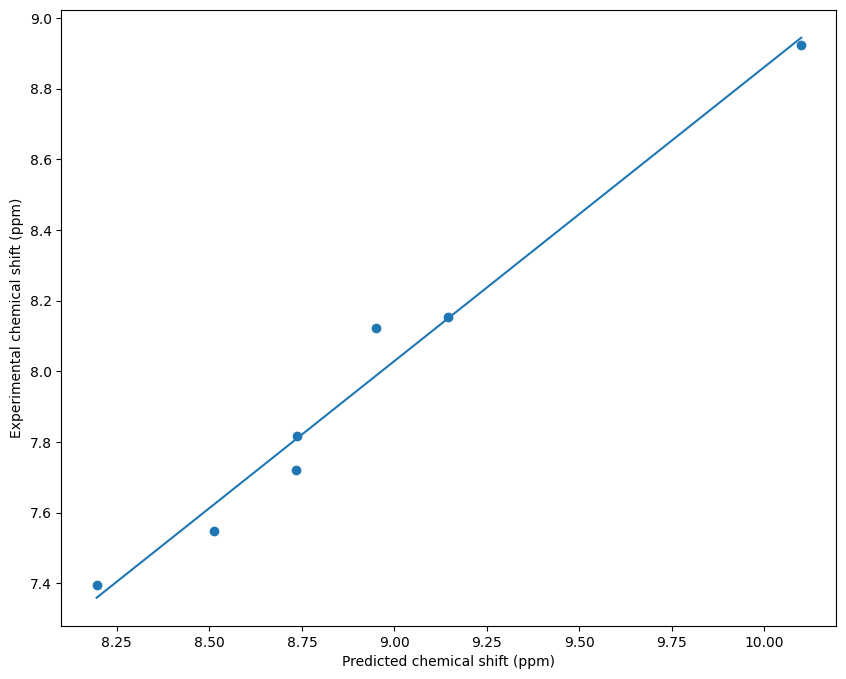

In [48]:
plt.scatter(pred_H_ppm, expt_H_ppm)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.xlabel('Predicted chemical shift (ppm)')
plt.ylabel('Experimental chemical shift (ppm)')


#find line of best fit and add to plot
a, b = np.polyfit(pred_H_ppm, expt_H_ppm, 1)
plt.plot(pred_H_ppm, a*pred_H_ppm+b)    
print('y = ' + '{:.2f}'.format(a) + 'x' + ' + {:.2f}'.format(b))
from sklearn.metrics import r2_score
print("R-squared =", r2_score(expt_H_ppm, a*pred_H_ppm+b))
